In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets

## Question that is being asked:

Citation:
“The Instacart Online Grocery Shopping Dataset 2017”, Accessed from https://www.instacart.com/datasets/grocery-shopping-2017 on <date>

Do people order different foods at different times of day?

First I need to read in the csv file to be able to do some analysis on the data.

In [60]:
cart_df = pd.read_csv("InstacartOrdersByDepartment.csv")
cart_df.head()

,order_hour_of_day,department,num_orders_hour,tot_orders_dept
0,0,alcohol,33.0,5598.0
1,1,alcohol,32.0,5598.0
2,2,alcohol,5.0,5598.0
3,3,alcohol,3.0,5598.0
4,4,alcohol,2.0,5598.0


I will now need to print the data out in a graph/plot format so first I will do a pair plot

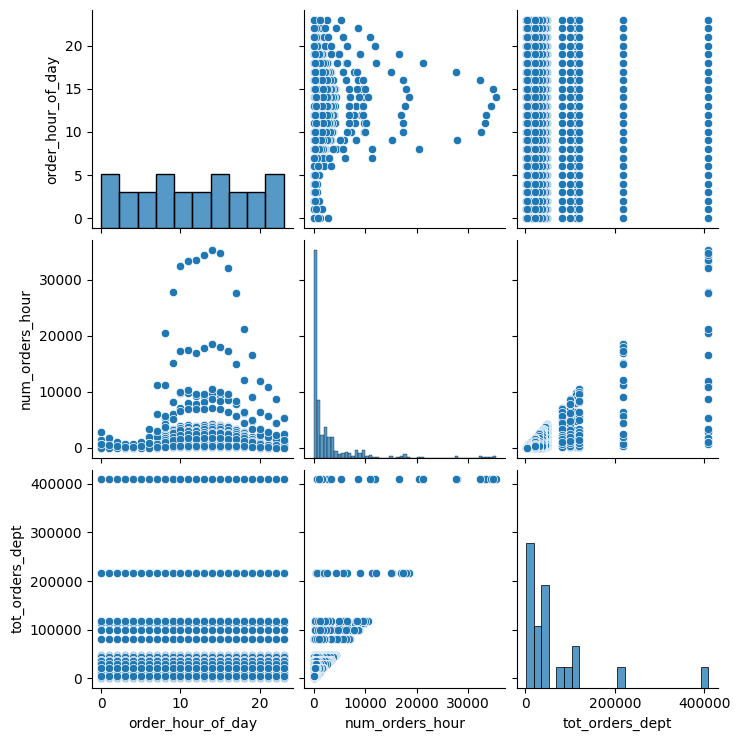

In [117]:
sns.pairplot(cart_df)

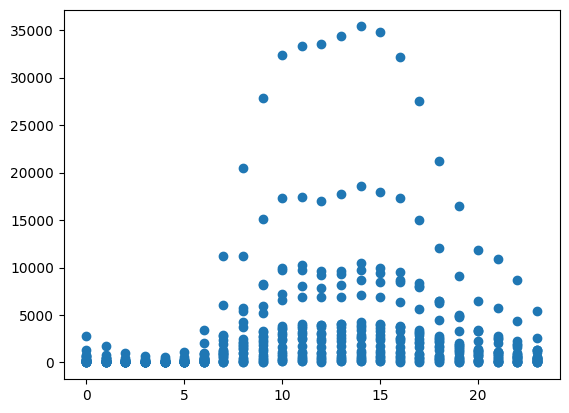

In [118]:
plt.scatter(cart_df.order_hour_of_day, cart_df.num_orders_hour, marker = 'o')

After creating the pairplot I can see that there is a relationship between order_hour_of_day and num_orders_hour, but it does not answer the question that we are asking.

So I descided to make a line plot where you can see what time of the day items are being bought. As you can see people are buying a lot of produce, so in terms of answering the question we can see that people do buy different goods at different times of the day.

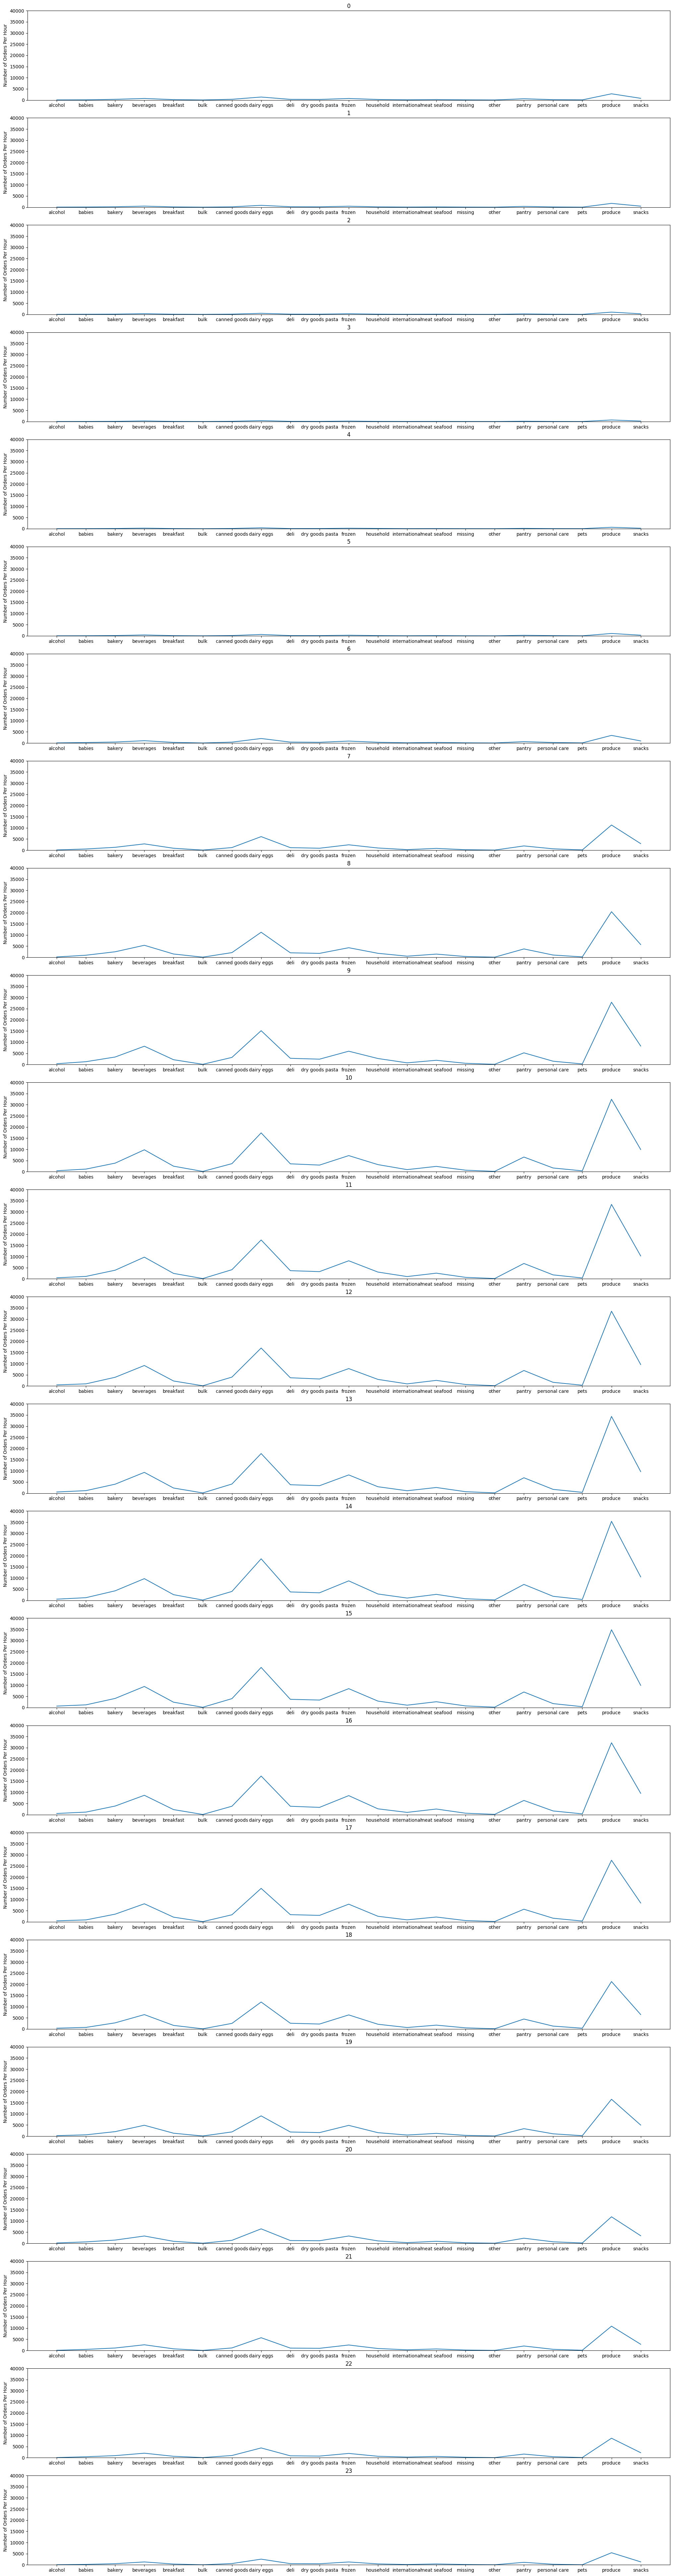

In [56]:
plt.figure(figsize=(25,100)) 

hourposs = cart_df.order_hour_of_day.unique()

for i,hour in enumerate(hourposs):
        BM = cart_df.order_hour_of_day == hour
        X= cart_df[BM].department
        Y= cart_df[BM].num_orders_hour
        
        plt.subplot(24,1,i+1)
        plt.plot(X,Y)
        plt.title(hour)
        plt.ylabel('Number of Orders Per Hour')
        plt.xlim([-1,21])
        plt.ylim([0,40000])
plt.show()


#### Below is a heatmap that shows what time of the day people buy different goods at.

C:\Users\Cole\AppData\Local\Temp\ipykernel_12684\492147738.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  dp = d.pivot("Department", "Hour of Day", "Ratio")


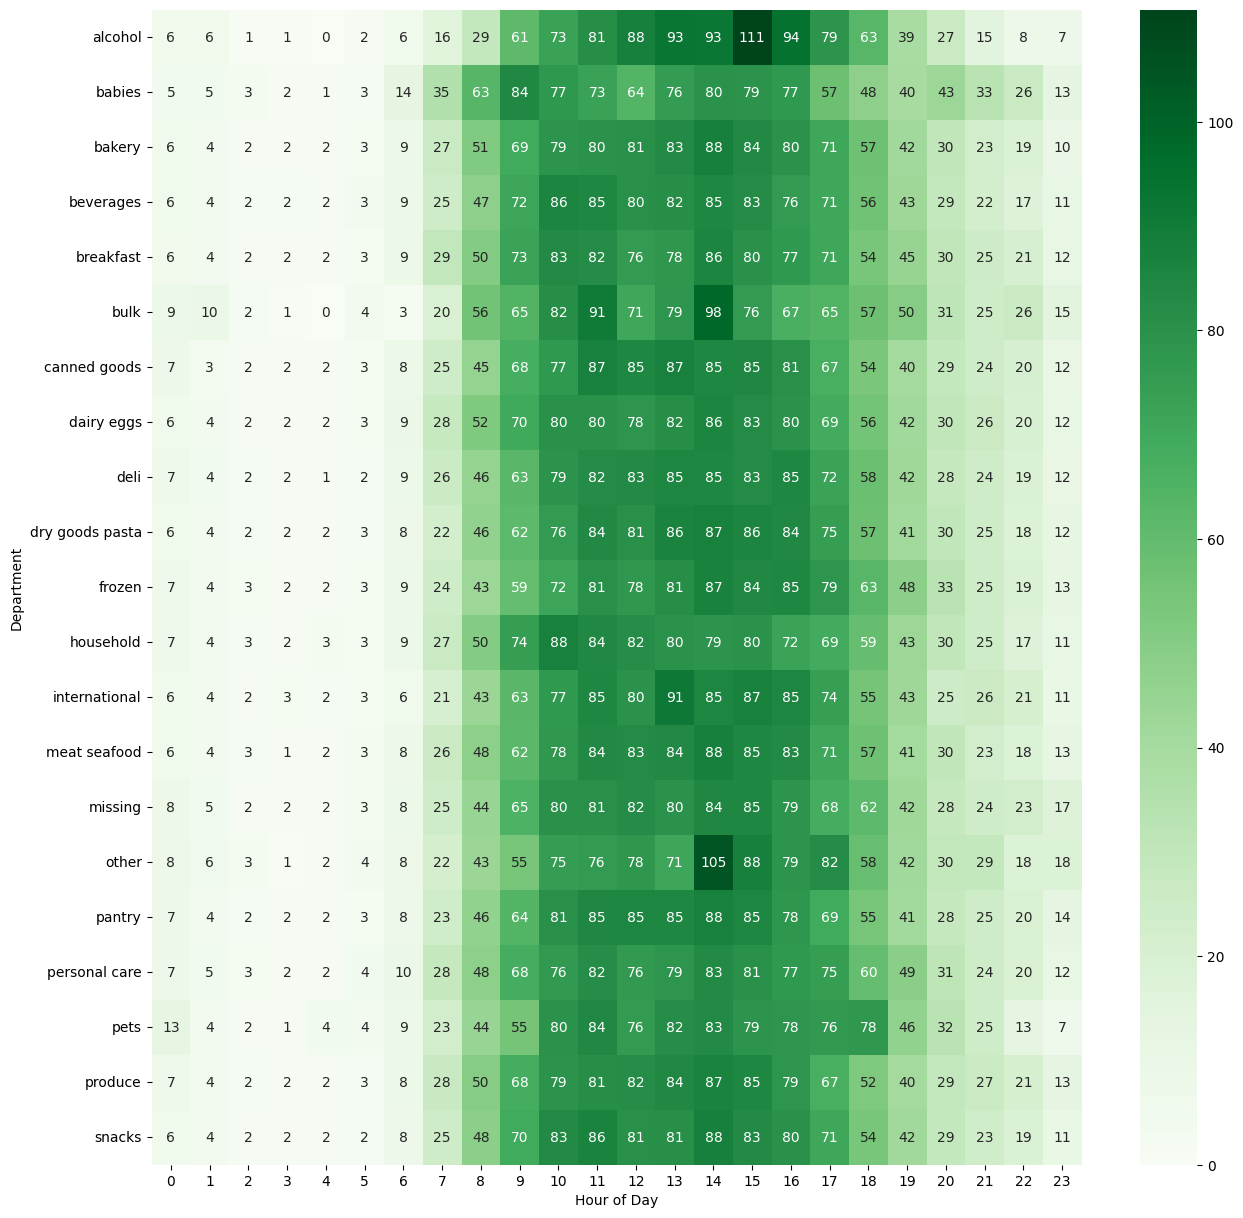

In [122]:
A = cart_df.department
B = cart_df.order_hour_of_day
C = ((cart_df.num_orders_hour/cart_df.tot_orders_dept)*1000)
newcart_df = pd.DataFrame({'Department': A, 'Hour of Day': B, 'Ratio': C})
dp = newcart_df.pivot("Department", "Hour of Day", "Ratio")

fig, x = plt.subplots(figsize=(15,15)) 

sns.heatmap(dp, annot=True, cmap='Greens', fmt='.0f', ax=x)
plt.show()

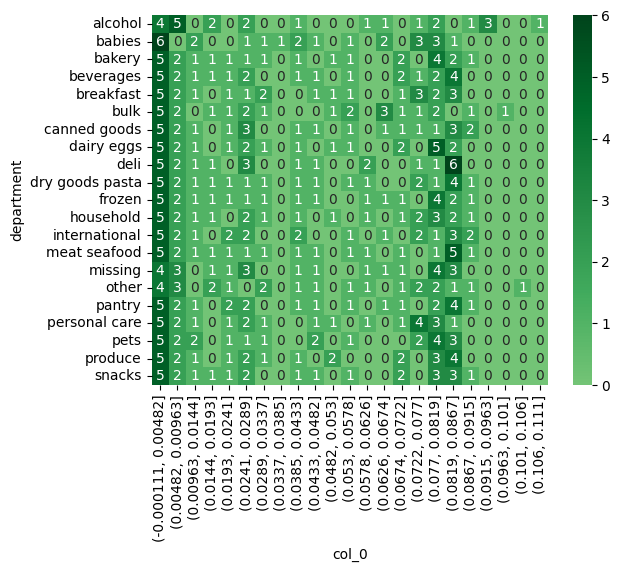

In [67]:
a = pd.cut(cart_df.order_hour_of_day, bins = 24) #not used in this diagram
g = pd.cut((cart_df.num_orders_hour/cart_df.tot_orders_dept), bins = 23)
c = pd.crosstab(cart_df.department, g)
p = c
sns.heatmap(p, annot=True, center=0 ,cmap="Greens")
plt.show()